# **Data Mentah**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Membaca data dari CSV
df = pd.read_csv('data iris 1.csv', delimiter=';')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# banyaknya data pada setiap class
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

`df['class'].value_counts()` digunakan untuk melihat **distribusi data pada kolom 'class'**. Hal ini membantu mengetahui jumlah sampel di setiap kategori.

In [5]:
# melihat data unik pada label
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`df['class'].unique()` digunakan untuk melihat **kategori unik** pada kolom 'class'. Hal ini memastikan tidak ada kategori yang salah atau tidak relevan.

# **Data Cleaning**

### **Handling Missing Values**

Proses menangani nilai yang hilang dalam dataset, biasanya dengan mengisi, menghapus, atau memperkirakan nilai tersebut.

In [6]:
# jumlah nilai hilang jenis Nan
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### **Handling Duplicate Data**

Proses mendeteksi dan menghapus data yang tercatat lebih dari satu kali agar tidak memengaruhi analisis.

In [7]:
# Menampilkan data yang terduplikat
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Verifikasi setelah duplikat dihapus
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class


### **Outlier Detection and Treatment**

Proses mendeteksi nilai ekstrem yang menyimpang jauh dari data lainnya dan mungkin tidak relevan atau salah.

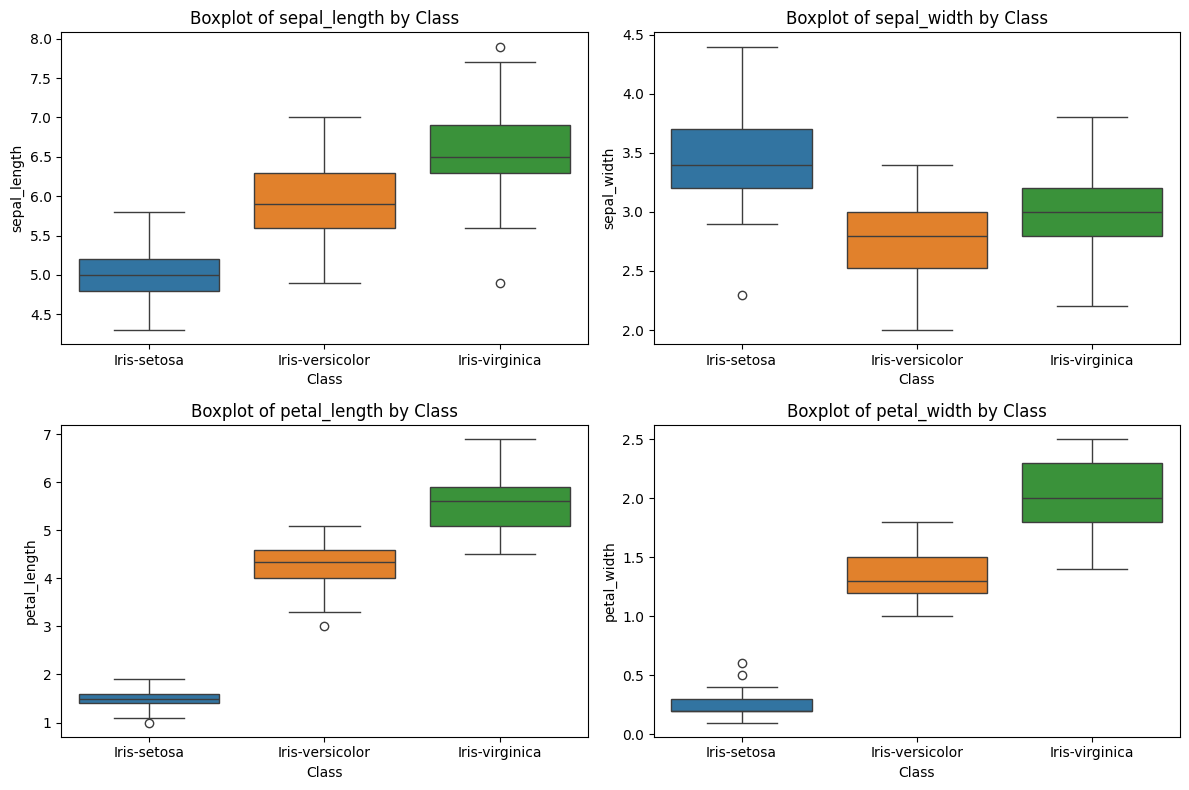

In [9]:
# Boxplot untuk memeriksa outlier per fitur berdasarkan class
plt.figure(figsize=(12, 8))
for i, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=column, data=df, hue='class', dodge=False)
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [28]:
# Menentukan fitur yang akan dianalisis
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Membuat DataFrame kosong untuk menampung data tanpa outlier
df_no_outlier = pd.DataFrame()

# Menghapus outlier untuk setiap fitur berdasarkan kelas
for class_label in df['class'].unique():
    class_data = df[df['class'] == class_label]
    
    for feature in features:
        Q1 = class_data[feature].quantile(0.25)
        Q3 = class_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        before_count = class_data.shape[0]
        
        # Menghapus outlier
        class_data = class_data[
            (class_data[feature] >= lower_bound) & 
            (class_data[feature] <= upper_bound)
        ]
        
        after_count = class_data.shape[0]
        # print(f"Kelas: {class_label}, Fitur: {feature}, Data Dihapus: {before_count - after_count}")
    
    # Gabungkan data yang sudah dihapus outlier ke dalam df_no_outlier
    df_no_outlier = pd.concat([df_no_outlier, class_data], axis=0)

# Menampilkan df_no_outlier setelah proses penghapusan outlier
df_no_outlier


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


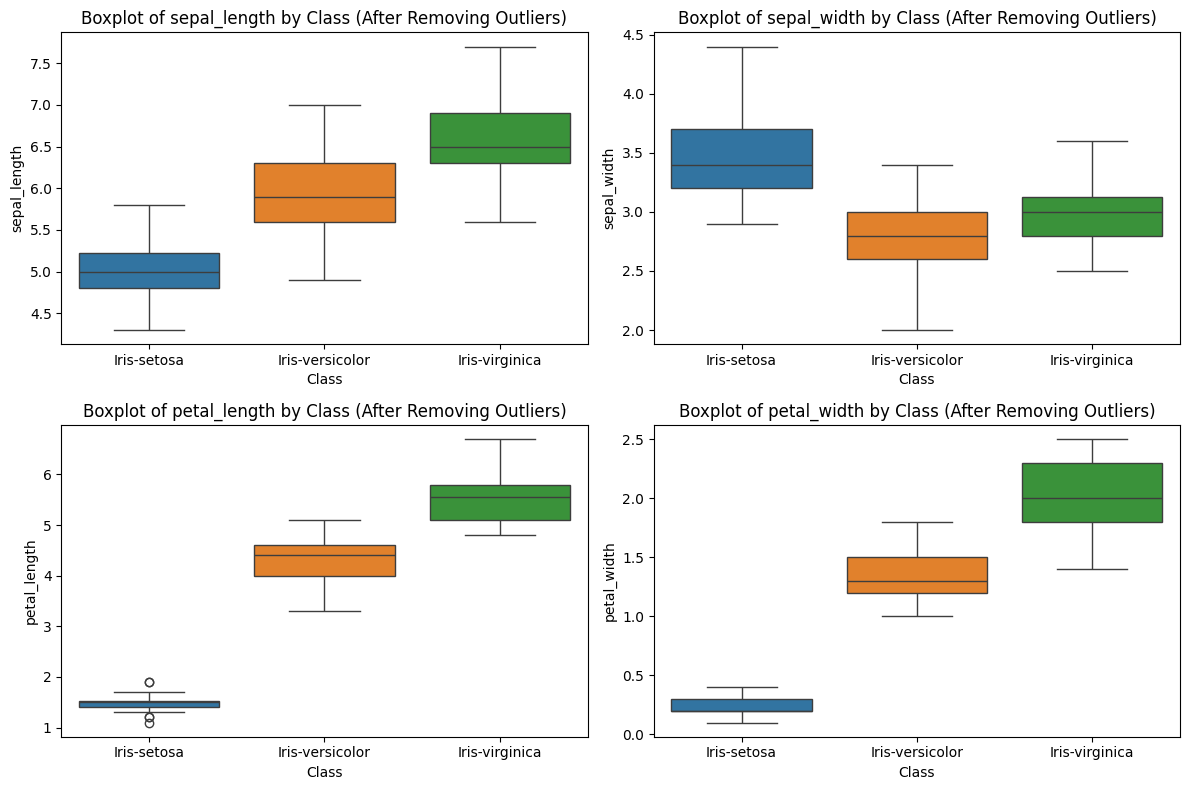

In [11]:
# Visualisasi boxplot untuk semua fitur berdasarkan class setelah menghapus outlier
plt.figure(figsize=(12, 8))
for i, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=column, data=df_no_outlier, hue='class', dodge=False)
    plt.title(f'Boxplot of {column} by Class (After Removing Outliers)')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.legend([], [], frameon=False)  # Menghilangkan legend
plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [12]:
# Mengubah data kategori (jika ada) menjadi numerik
df_no_outlier.loc[:, 'class'] = df_no_outlier['class'].map({
    'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2
})

# Menampilkan beberapa data untuk memastikan preprocessing berjalan dengan benar
print("\nData Setelah Preprocessing:")
df_no_outlier



Data Setelah Preprocessing:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# Normalisasi fitur
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    min_val = df_no_outlier[feature].min()
    max_val = df_no_outlier[feature].max()
    df_no_outlier[feature] = (df_no_outlier[feature] - min_val) / (max_val - min_val)

# Cek hasil normalisasi
df_no_outlier.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,0.235294,0.625000,0.053571,0.041667,0
1,0.176471,0.416667,0.053571,0.041667,0
2,0.117647,0.500000,0.035714,0.041667,0
3,0.088235,0.458333,0.071429,0.041667,0
4,0.205882,0.666667,0.053571,0.041667,0


In [14]:
# Standarisasi fitur
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    mean_val = df_no_outlier[feature].mean()
    std_val = df_no_outlier[feature].std()
    df_no_outlier[feature] = (df_no_outlier[feature] - mean_val) / std_val

# Cek hasil standarisasi
print(df_no_outlier.head(500))


     sepal_length  sepal_width  petal_length  petal_width class
0       -0.968013     1.047509     -1.384767    -1.329090     0
1       -1.223785    -0.140477     -1.384767    -1.329090     0
2       -1.479557     0.334717     -1.442997    -1.329090     0
3       -1.607443     0.097120     -1.326537    -1.329090     0
4       -1.095899     1.285106     -1.384767    -1.329090     0
..            ...          ...           ...          ...   ...
145      1.078163    -0.140477      0.827970     1.443783     2
146      0.566619    -1.328463      0.711510     0.915617     2
147      0.822391    -0.140477      0.827970     1.047659     2
148      0.438733     0.809911      0.944430     1.443783     2
149      0.055075    -0.140477      0.769740     0.783575     2

[137 rows x 5 columns]


In [15]:
# Memeriksa distribusi kelas
print(df_no_outlier['class'].value_counts())

# Jika kelas tidak seimbang, Anda bisa melakukan oversampling (menambah kelas minoritas) atau undersampling (mengurangi kelas mayoritas).
# Contoh: Oversampling kelas minoritas
minority_class = df_no_outlier[df_no_outlier['class'] == 2]
majority_class = df_no_outlier[df_no_outlier['class'] != 2]

# Menggandakan baris kelas minoritas
oversampled_minority_class = minority_class.sample(len(majority_class), replace=True)

# Gabungkan kembali
df_no_outlier_balanced = pd.concat([majority_class, oversampled_minority_class])

# Cek distribusi kelas setelah balancing
print(df_no_outlier_balanced['class'].value_counts())


class
1    49
0    44
2    44
Name: count, dtype: int64
class
2    93
1    49
0    44
Name: count, dtype: int64


In [16]:
# Melihat beberapa baris data untuk memastikan preprocessing berjalan dengan benar
print(df_no_outlier.head(100))

# Menampilkan statistik deskriptif
print(df_no_outlier.describe())


     sepal_length  sepal_width  petal_length  petal_width class
0       -0.968013     1.047509     -1.384767    -1.329090     0
1       -1.223785    -0.140477     -1.384767    -1.329090     0
2       -1.479557     0.334717     -1.442997    -1.329090     0
3       -1.607443     0.097120     -1.326537    -1.329090     0
4       -1.095899     1.285106     -1.384767    -1.329090     0
..            ...          ...           ...          ...   ...
102      1.589707    -0.140477      1.235579     1.179700     2
103      0.566619    -0.378074      1.060890     0.783575     2
104      0.822391    -0.140477      1.177350     1.311742     2
105      2.229136    -0.140477      1.643189     1.179700     2
107      1.845478    -0.378074      1.468499     0.783575     2

[100 rows x 5 columns]
       sepal_length   sepal_width  petal_length   petal_width
count  1.370000e+02  1.370000e+02  1.370000e+02  1.370000e+02
mean  -5.186443e-17  3.371188e-16  1.555933e-16 -1.555933e-16
std    1.000000e+00  1

# **Eksplorasi Data**

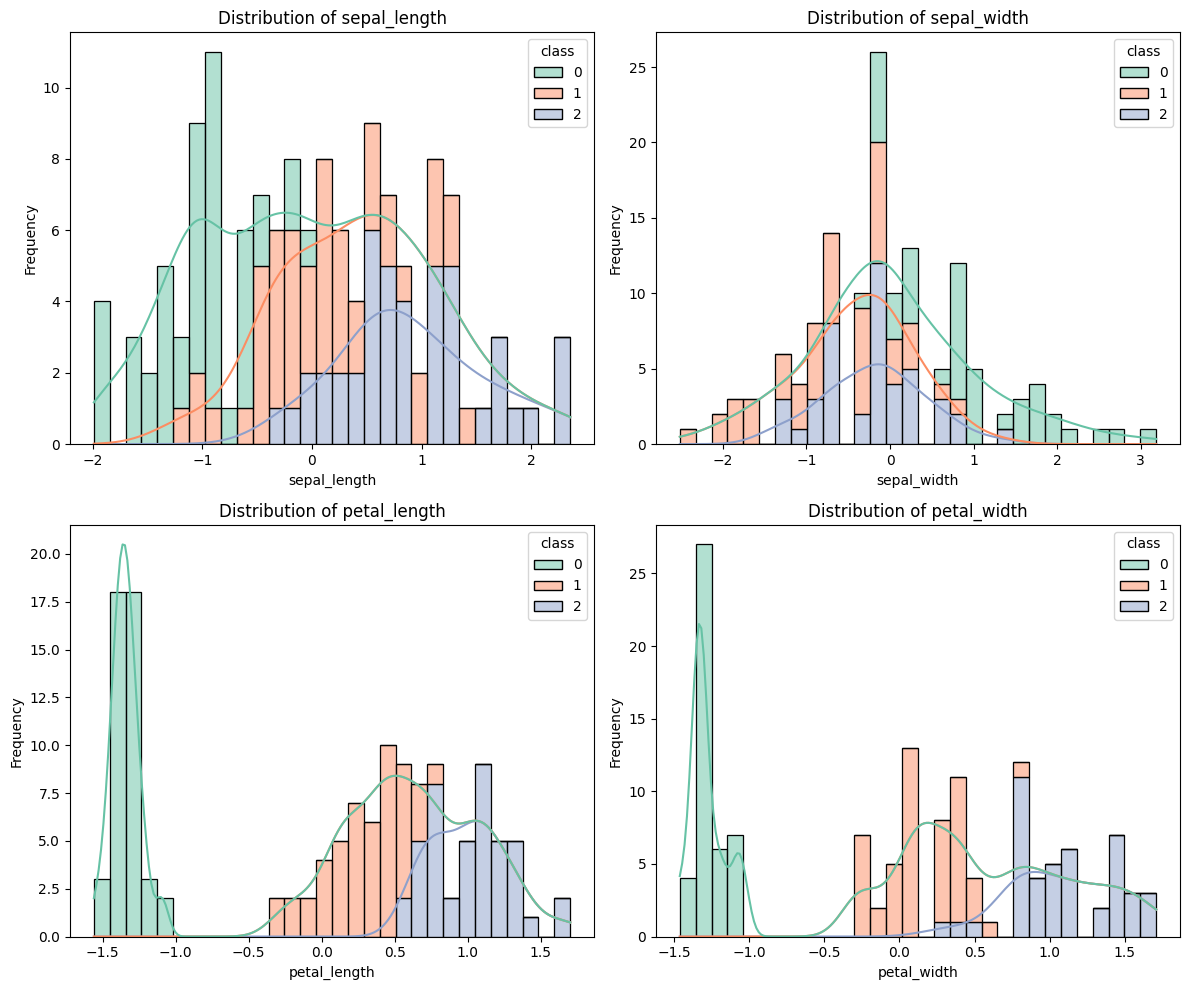

In [17]:
# Visualisasi distribusi fitur dengan histogram dan KDE
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_no_outlier, x=feature, hue="class", kde=True, palette="Set2", multiple="stack", bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


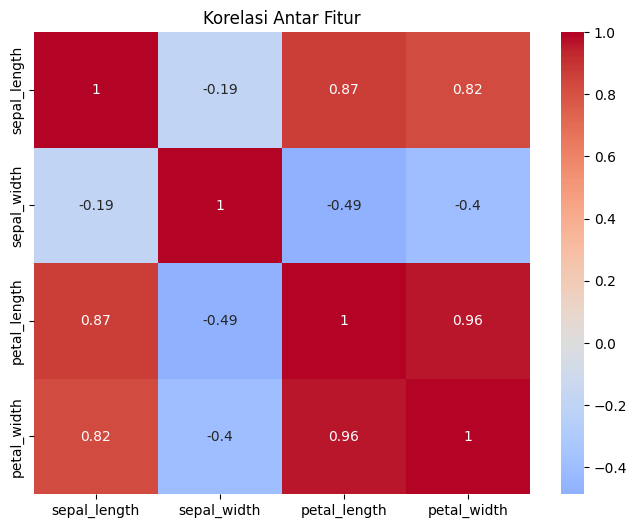

In [18]:
# Korelasi antar fitur
correlation_matrix = df_no_outlier[features].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Korelasi Antar Fitur")
plt.show()


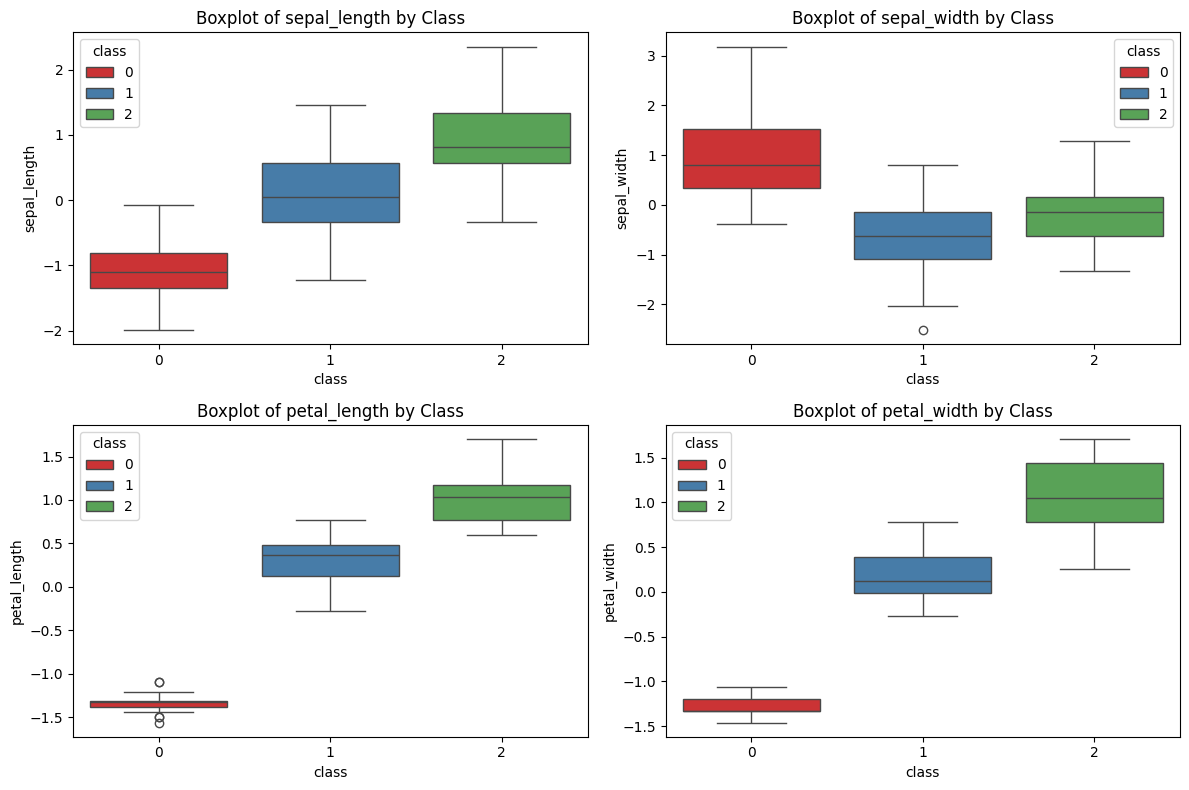

In [19]:
# Visualisasi Boxplot untuk masing-masing fitur berdasarkan kelas
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="class", y=feature, data=df_no_outlier, palette="Set1", hue="class")
    plt.title(f'Boxplot of {feature} by Class')

plt.tight_layout()
plt.show()


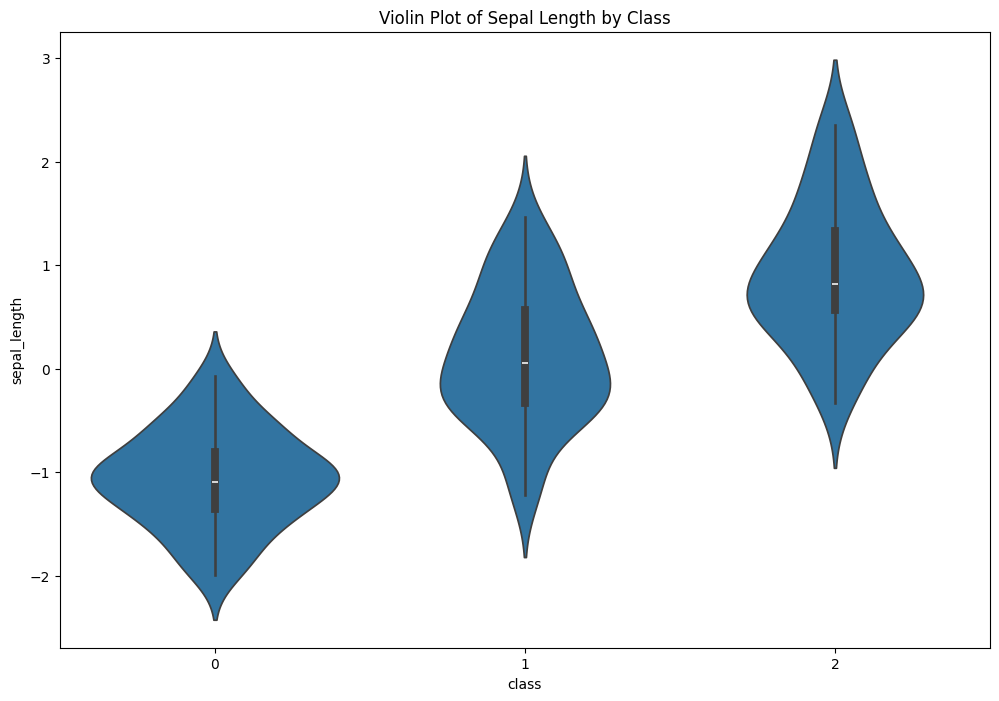

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='sepal_length', data=df_no_outlier)
plt.title('Violin Plot of Sepal Length by Class')
plt.show()


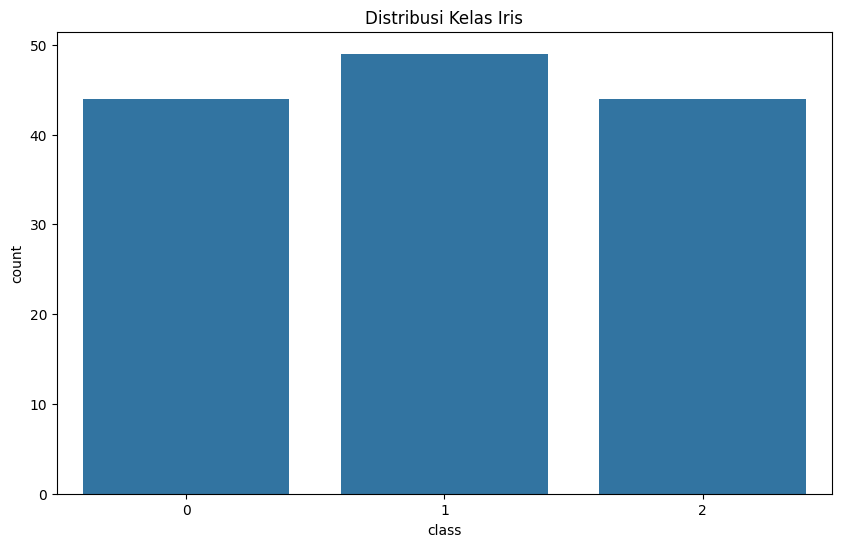

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_no_outlier)
plt.title('Distribusi Kelas Iris')
plt.show()


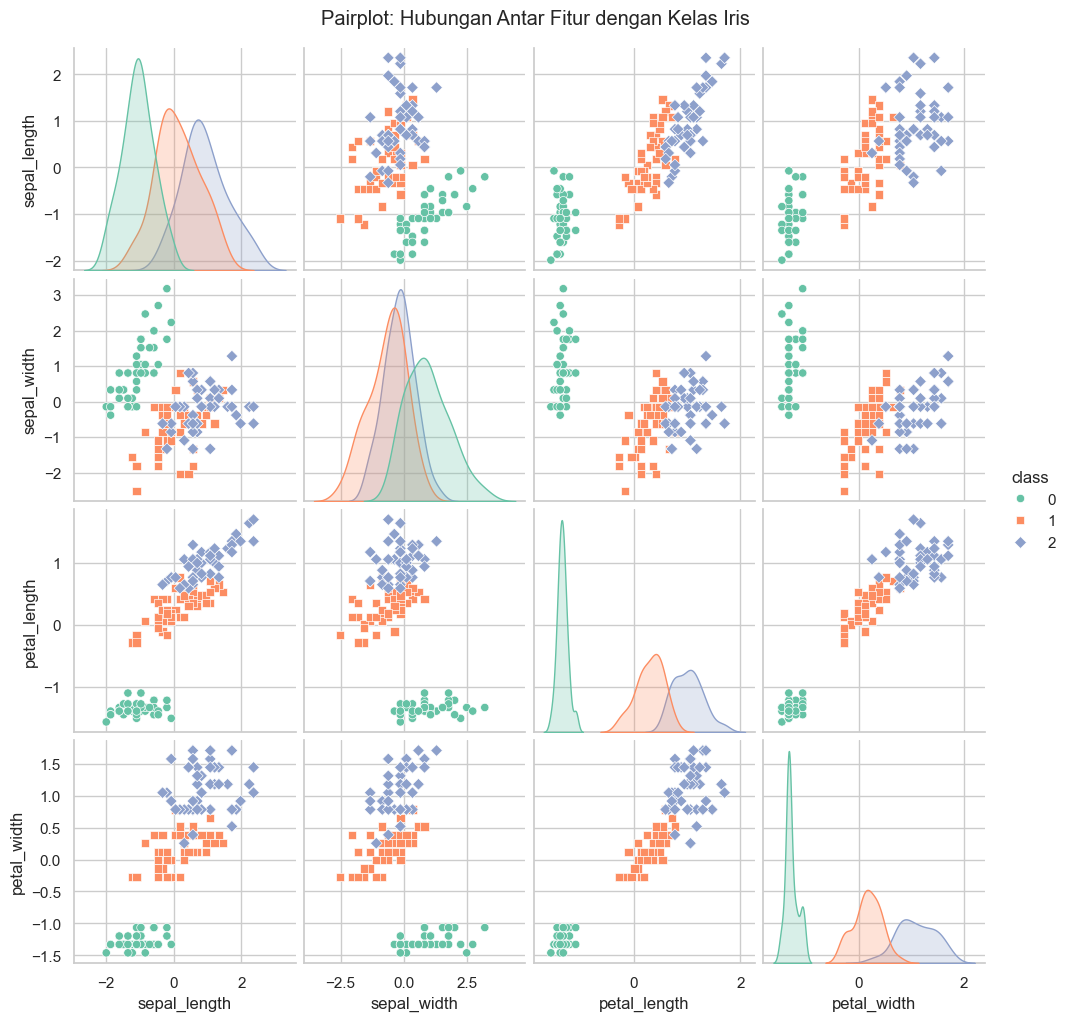

In [22]:
# Pastikan data sudah diproses dengan benar
sns.set(style="whitegrid")  # Set style untuk plot

# Membuat pairplot untuk melihat hubungan antar fitur dengan kelas sebagai hue
sns.pairplot(df_no_outlier, hue="class", markers=["o", "s", "D"], palette="Set2")

# Menambahkan judul
plt.suptitle("Pairplot: Hubungan Antar Fitur dengan Kelas Iris", y=1.02)
plt.show()

# **Clustering**

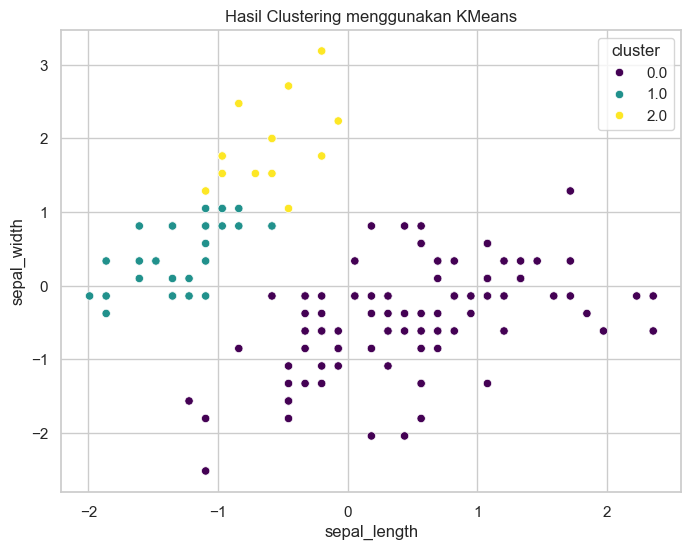

In [23]:
# Melakukan clustering menggunakan KMeans tanpa sklearn
import numpy as np

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KMeans - Inisialisasi centroids secara acak
def kmeans(X, k=3, max_iters=100):
    # Inisialisasi centroids secara acak
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    clusters = np.zeros(X.shape[0])
    
    for i in range(max_iters):
        # Menetapkan label ke titik data berdasarkan centroid terdekat
        for j in range(X.shape[0]):
            distances = np.array([euclidean_distance(X[j], centroid) for centroid in centroids])
            clusters[j] = np.argmin(distances)
        
        # Menyusun ulang centroids berdasarkan rata-rata cluster
        new_centroids = np.array([X[clusters == c].mean(axis=0) for c in range(k)])
        
        # Menghentikan jika centroids tidak berubah
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return clusters, centroids

# Memilih data (hanya kolom fitur tanpa 'class')
X = df_no_outlier.drop(columns=['class']).values

# Menjalankan KMeans dengan 3 cluster
clusters, centroids = kmeans(X, k=3)

# Menambahkan label cluster ke data
df_no_outlier['cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_no_outlier['sepal_length'], y=df_no_outlier['sepal_width'], hue=df_no_outlier['cluster'], palette='viridis')
plt.title("Hasil Clustering menggunakan KMeans")
plt.show()

# **Analisis Kerja**

In [24]:
# Menghitung akurasi clustering berdasarkan kesesuaian dengan label asli (species)
from collections import Counter

def accuracy(predictions, true_labels):
    # Menghitung jumlah cluster yang sesuai dengan label sebenarnya
    matches = sum(predictions == true_labels)
    return matches / len(true_labels)

# Menghitung akurasi clustering (menggunakan species sebagai label asli)
true_labels = df_no_outlier['class'].values
accuracy_value = accuracy(clusters, true_labels)

print("\nAkurasi Clustering: {:.2f}%".format(accuracy_value * 100))



Akurasi Clustering: 0.00%
